# Predicting loan outcomes: Some exploratory data analysis
16 Oct 2016.

In [1]:
import matplotlib

import os
import sqlite3
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 6.0)
matplotlib.rcParams['font.size'] = 16.0

## Data

In [3]:
DIR = os.getcwd() + "/../data/"
DIR

'/Users/angelaambroz/Dropbox (Personal)/_Harvard Ext School/Data Science Certificate/2016 Fall CSC E-109A/cs109a-Project/notebooks/../data/'

In [4]:
df = pd.read_csv(DIR + 'raw/lending-club-loan-data/loan.csv')
df.head()

/usr/local/lib/python2.7/site-packages/pandas-0.16.2-py2.7-macosx-10.10-x86_64.egg/pandas/io/parsers.py:1170: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
df.shape

(887379, 74)

### OK, so loan.csv is database.sqlite

In [6]:
df['purpose'].head()

0       credit_card
1               car
2    small_business
3             other
4             other
Name: purpose, dtype: object

B    0.286839
C    0.277063
A    0.167011
D    0.157252
E    0.079678
F    0.025971
G    0.006186
dtype: float64


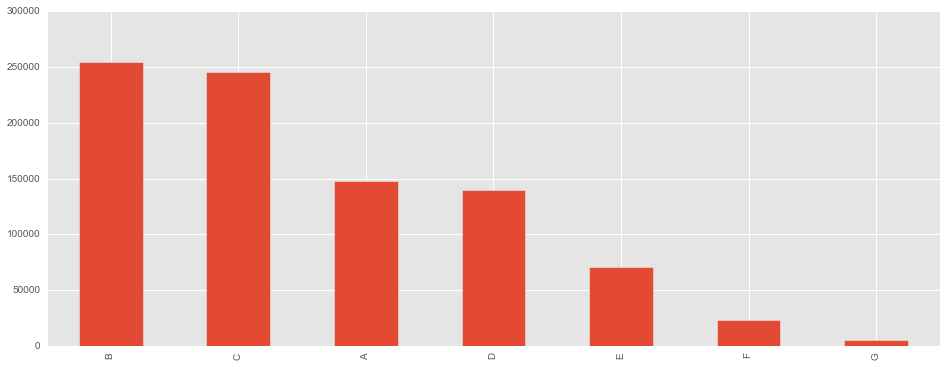

In [13]:
print df['grade'].value_counts() / len(df['grade'])
df['grade'].value_counts().plot(kind = 'bar')

B3    0.063471
B4    0.062686
C1    0.060163
C2    0.058865
C3    0.056527
C4    0.055058
B5    0.055031
B2    0.054972
B1    0.050680
A5    0.050504
C5    0.046450
D1    0.040837
A4    0.038913
D2    0.033585
D3    0.029924
D4    0.028802
A3    0.026434
A1    0.025821
A2    0.025339
D5    0.024104
E1    0.020586
E2    0.019162
E3    0.015928
E4    0.013212
E5    0.010790
F1    0.008134
F2    0.006076
F3    0.004996
F4    0.003842
F5    0.002923
G1    0.002108
G2    0.001575
G3    0.001106
G4    0.000747
G5    0.000649
dtype: float64


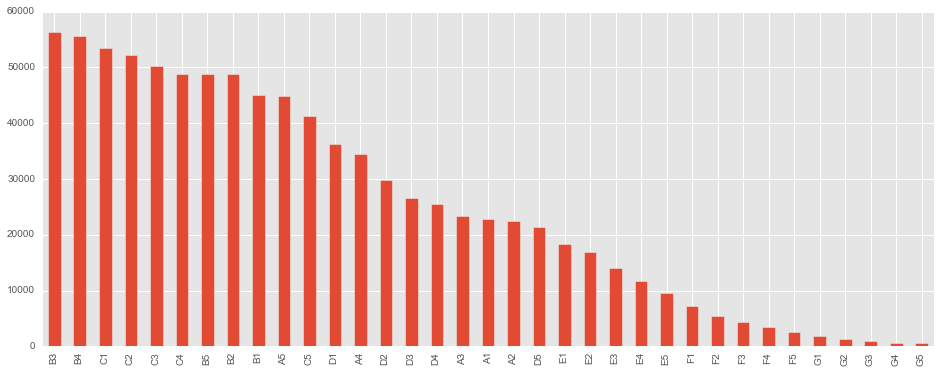

In [17]:
print df['sub_grade'].value_counts() / len(df['sub_grade'])
df['sub_grade'].value_counts().plot(kind = 'bar')

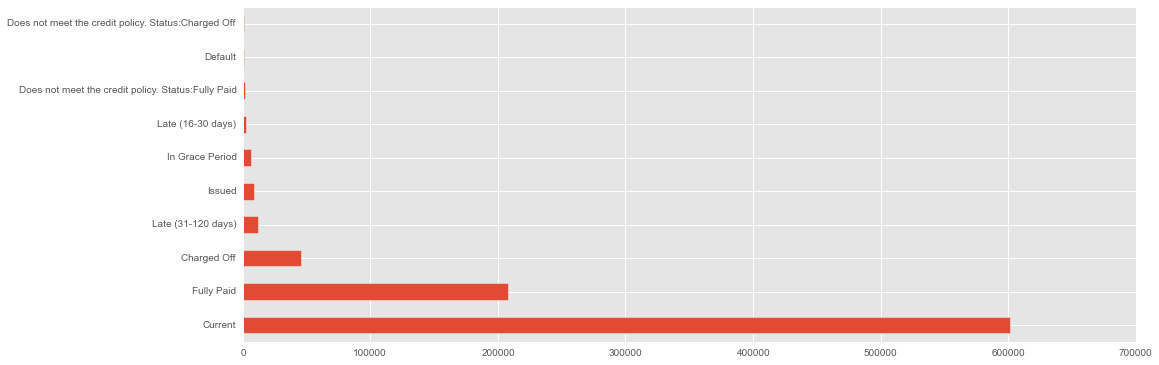

In [33]:
df['loan_status'].value_counts().plot(kind = 'barh')

In [34]:
df['loan_status'].value_counts() / len(df['loan_status'])

Current                                                0.678153
Fully Paid                                             0.234086
Charged Off                                            0.050991
Late (31-120 days)                                     0.013062
Issued                                                 0.009534
In Grace Period                                        0.007047
Late (16-30 days)                                      0.002656
Does not meet the credit policy. Status:Fully Paid     0.002240
Default                                                0.001374
Does not meet the credit policy. Status:Charged Off    0.000858
dtype: float64

In [18]:
sns.pairplot(df)

ValueError: max must be larger than min in range parameter.